In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd

sns.set()
sns.set_context("talk")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.utils import shuffle
from sklearn import tree, datasets, preprocessing, ensemble
from sklearn.metrics import confusion_matrix

from IPython.display import display, Latex, Markdown

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import copy

Data 100 Final Project : Contraceptive Dataset Study

Contributors: Kenneth Chang, Bradley Jang, Jessie Houng

Research Questions: 

1) Which features involving personal and spouse demographics most strongly determine what type of contraceptive a woman uses?
2) What confounding features may, in extension, help determine the contraceptive they use, considering other dataset features such as geographical demographics or income?
3) Is the dataset provided sufficient for predicting contraceptive use in women, given that there are inherent biases in the demographics of women selected for the study?

Data Set Information:

https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

original original data: https://microdata.worldbank.org/index.php/catalog/1398/study-description

This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. 
The samples are married women who were either not pregnant or do not know if they were at the time of interview. 
The problem is to predict the current contraceptive method choice 
(no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.


Attribute Information:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No (we flipped these in our data)
7. Husband's occupation (categorical) 1, 2, 3, 4 (Professional&Technical&Clerical, Sales&Services, Manual, Agriculture)
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9.  Media exposure (binary) 0=Good, 1=Not good (we flipped these in our data)
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term (we changed these so that 0=No-use, 1=Short-term, 2=Long-term)

Notes on the sample data:

Since the sample population is based on women who were married, and excluded women who were pregnant, we acknowledge that a significant amount of the population variance may be obscured by the inherent sampling bias of the survey. The original study focuses on trying to predict the contraceptive method women use based on their demographic and socio-economic characteristics, but it is important to note that the exclusion of data from women who were not married or were pregnant ignores the obvious cases where women may have been taking contraceptives up until an unintended pregnancy, or may be taking contraceptives despite not being married.

In [2]:
#load the dataset into a pandas Dataframe
contraceptives = pd.read_csv('contraceptive_for_students.csv')
ceptives = contraceptives.copy(deep=True)

//PLAN

One Hot Encode:
- wife education
- husband education
- husband occupation
- standard living
  

Try different Models on original dataset, with features that we can use?
- if lacking, use other features from datasets provided by instructors


Data Cleaning:
- join dataset with broader dataset (if necessary)
- clean nan values, etc


Try different Models:



Dataframe Analysis and Cleaning:
=======

In [36]:
#displays dataframe
print(contraceptives.shape)
ceptives.head()

(1473, 10)


,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [37]:
#Displays unique values from each column
cols = ceptives.columns
for i in cols:
    print(i, end=":\n")
    print(np.sort(ceptives[i].unique()), end="\n\n")

wife_age:
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49]

wife_education:
[1 2 3 4]

husband_education:
[1 2 3 4]

num_child:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16]

wife_religion:
[0 1]

wife_work:
[0 1]

husband_occupation:
[1 2 3 4]

standard_living:
[1 2 3 4]

media_exposure:
[0 1]

contraceptive:
[1 2 3]



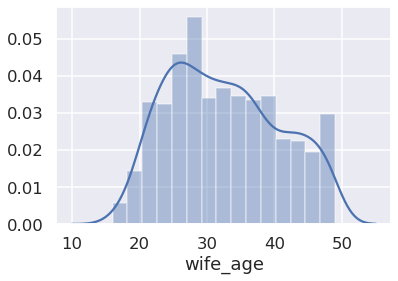

In [38]:
#displays distribution of the ages of women surveyed
sns.distplot(ceptives['wife_age'])

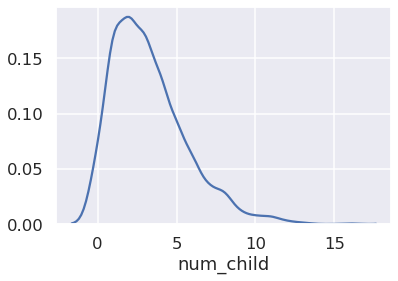

In [39]:
#displays distribution of the number of children by the women surveyed
sns.distplot(ceptives['num_child'])

In [40]:
#calculating the percentage of families with number of children less than 8
len(ceptives[ceptives['num_child'] < 8])/contraceptives.shape[0] * 100

93.75424304141208

From the distribution plot of the number of children, we noticed that very few women have more than 8 children, and decided to filtered out women who do from the dataset, considering them outliers.
We still managed to maintain 93.75% of our original dataset, since we were mindful about excluding too much of our data.

Because we are attempting to predict the number of children a women will have, we removed the data from women with greater than 8 children, deeming them to be outliers we did not want to train our model with.

In [41]:
#we purposely did not reset the index so that we can reference the unique indexes of the original dataset if desired at a later point
ceptives = ceptives[ceptives['num_child'] < 8]
ceptives.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
2,43,2,3,7,1,1,3,4,0,1
5,19,4,4,0,1,1,3,3,0,1
6,38,2,3,6,1,1,3,2,0,1
7,21,3,3,1,1,0,3,2,0,1


In [42]:
'''
- cleaned Dataframe
- flipped the values of "wife_work" and "media_exposure" columns for readability
    In the original dataset, a value of 0 in the "wife_work" column meant the wife was working, which we deemed misleading in the sense that
    0 is usually a falsey value, and thus we would usually assume a value of 1 meant the wife was working.

'''
wifeworkflipped = [(not x) * 1 for x in ceptives["wife_work"]]
ceptives["wife_work"] = wifeworkflipped
mediaflipped = [(not x) * 1 for x in ceptives["media_exposure"]]
ceptives["media_exposure"] = mediaflipped
ceptives['contraceptive'] = ceptives['contraceptive'].replace({1:0, 3:1})
ceptives.rename(columns = {'wife_work': 'wife_work_flipped', 'media_exposure': 'media_exposure_flipped', 'contraceptive': 'contraceptive_revised'})
ceptives.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,0,2,3,1,0
2,43,2,3,7,1,0,3,4,1,0
5,19,4,4,0,1,0,3,3,1,0
6,38,2,3,6,1,0,3,2,1,0
7,21,3,3,1,1,1,3,2,1,0


In [43]:
np.sort(ceptives['contraceptive'].unique())

array([0, 1, 2])

One Hot Encoding The Dataset:
==

In [44]:
# Here we manually one-hot-encode the data because we were unable to figure out how to use the builtin ones.
# Note that 
def manual_one_hot_encoder(data, col_name, num):
    for j in np.arange(1, num+1):
        temp_name = col_name + "_" + str(j)
        data[temp_name] = [1 if x == j else 0 for x in data[col_name]]
    return
    
def auto_manual_one_hot_encoder(data, dict_col_names):
    len_dict = len(dict_col_names)
    for k in np.arange(len_dict):
        pair = dict_col_names.popitem()
        manual_one_hot_encoder(data, pair[0], pair[1])
        data = data.drop(columns=pair[0], axis=1)
    return data

categorical_columns = {"wife_education" : 4, "husband_education": 4, "husband_occupation": 4, "standard_living" : 4}
ceptives = auto_manual_one_hot_encoder(ceptives, categorical_columns)
ceptives.head()

,wife_age,num_child,wife_religion,wife_work,media_exposure,contraceptive,standard_living_1,standard_living_2,standard_living_3,standard_living_4,...,husband_occupation_3,husband_occupation_4,husband_education_1,husband_education_2,husband_education_3,husband_education_4,wife_education_1,wife_education_2,wife_education_3,wife_education_4
0,24,3,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,43,7,1,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
5,19,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
6,38,6,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
7,21,1,1,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0


Train Test Split:
==

In [45]:
# Get a train/test split of the data where we split into a 70/30 split
np.random.seed(420)

X = ceptives.drop('contraceptive', axis = 1)
Y = ceptives['contraceptive']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size = 0.3, random_state = 420)

training_set = X_train.copy()
training_set["contraceptive"] = Y_train
test_set = X_test.copy()
test_set["contraceptive"] = Y_test

In [46]:
# Helper function to determine the accuracy of individual columns as predictors
def get_dict_cols_as_features(x_training, y_training):
    lr_model = LogisticRegression(max_iter=1000)
    xcols = x_training.columns
    ret_dict = {}
    for column in xcols:
        predicted = np.mean(cross_val_score(lr_model, pd.DataFrame(x_training[column]), y_training, cv=3))
        ret_dict[column] = predicted
    return ret_dict

In [47]:
# A function that returns the sorted array of which columns produce the best cross validated accuracy as a solo-predictor.
def get_array_sorted_col_names(x_training, y_training):
    unsorted_cols_values = get_dict_cols_as_features(x_training, y_training)
    copydict = unsorted_cols_values.copy()
    lencopy = len(copydict)
    newset = [None] * lencopy
    for k in np.arange(lencopy):
        maximum = max(copydict, key=copydict.get)
        #print(maximum)
        newset[k] = maximum
        copydict.pop(maximum, None)
    return newset

In [48]:
#best_col_names = get_array_sorted_col_names(X_train, Y_train)
#best_col_names #sorted in descending order of columns which singlehandedly produce the best cross validated accuracy as a predictor.

Fitting the Model/Getting Train and Test Scores with Logistic Regression:
==

In [68]:
# a function that processes the data by shuffling the columns names 
# and trying a k-first-features approach to find the best grouping of features 
# Returns a list of three things: 
# [a processed x_train dataframe, the list of columns used, and a dictionary of k-features length and its prediciton score]
def process_data(df, y_training):
    arr = get_array_sorted_col_names(df, y_training)
    print("single best col names: ", arr)
    last_model = LogisticRegression(max_iter=10000)

    arr_len = len(arr)
    max_x_train = None
    max_x_score = 0
    shuffled = copy.deepcopy(arr)
    dict_max_train = {}
    
    for _ in np.arange(8):
        curr_x_list = []
        for n in np.arange(arr_len):
            curr_x_list = curr_x_list + [shuffled[n]]
            curr_x_train = df[curr_x_list]
            predicted = np.mean(cross_val_score(last_model, curr_x_train, y_training, cv=3))
            
            if predicted > max_x_score:
                max_x_train = copy.deepcopy(curr_x_list)
                max_x_score = predicted
                dict_max_train[len(curr_x_list)] = predicted
        shuffled = shuffle(shuffled)
    
    print(max_x_train)
    print("Score: ", max_x_score)
    return [df[max_x_train], max_x_train, dict_max_train]

#add k-features graph here

    
p_data = process_data(X_train, Y_train)
processed_X_train = p_data[0]
# Y_train = ceptives['num_child']

logistic_model = LogisticRegressionCV(Cs = 4, fit_intercept = True, cv = 5, max_iter = 10000)
logistic_model.fit(processed_X_train, Y_train)
training_accuracy = logistic_model.score(processed_X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

single best col names:  ['wife_education_4', 'num_child', 'wife_work', 'media_exposure', 'standard_living_1', 'standard_living_3', 'standard_living_4', 'husband_occupation_1', 'husband_occupation_2', 'husband_occupation_3', 'husband_occupation_4', 'husband_education_1', 'husband_education_2', 'husband_education_4', 'wife_education_1', 'wife_education_2', 'wife_age', 'husband_education_3', 'wife_religion', 'wife_education_3', 'standard_living_2']
['husband_occupation_1', 'wife_education_4', 'num_child', 'husband_education_1', 'standard_living_2', 'standard_living_4', 'husband_occupation_4', 'husband_education_3', 'standard_living_1', 'husband_education_2', 'media_exposure', 'wife_education_2', 'wife_education_3', 'wife_age', 'wife_education_1', 'husband_occupation_2']
Score:  0.5476190476190476
Training Accuracy:  0.5559006211180124


In [69]:
# using our model/selected best features, lets figure out what our test accuracy is
processed_X_test = X_test[p_data[1]]

logistic_model.fit(processed_X_test, Y_test)
test_accuracy = logistic_model.score(processed_X_test, Y_test)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.5518072289156627


In [70]:
# assigning the variable "model" to be a fitted logistic regression model of our best features
# for later use
model =  LogisticRegression(max_iter = 10000)
model.fit(processed_X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

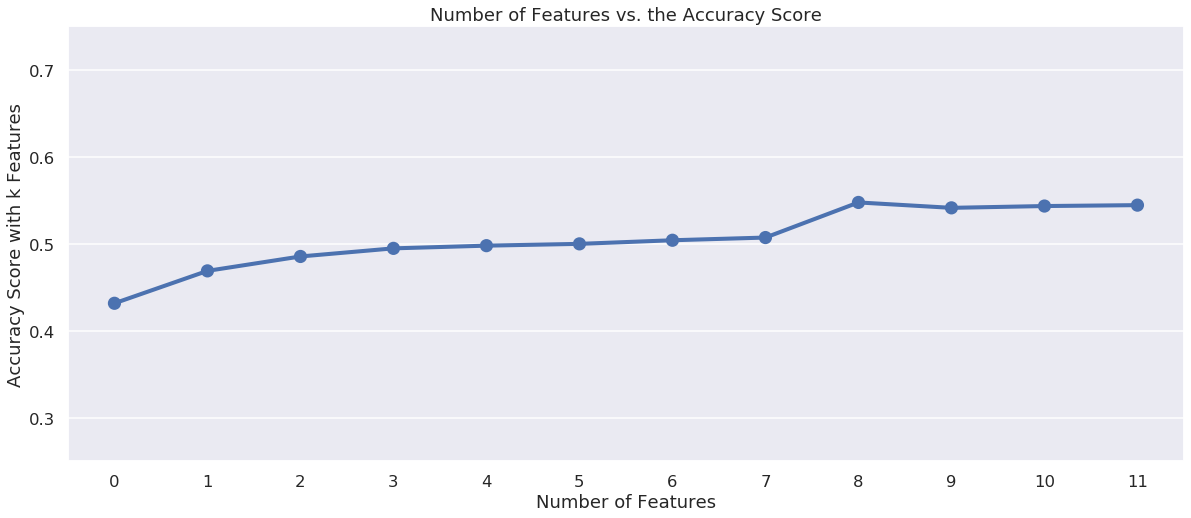

In [72]:
# Plotting a graph of the number of features vs the accuracy score they get, showing that accuracy can be improved with more features
# Note that this graph only kept track of when increasing features improved our accuracy
# this was done as a precaution against a bad graph since we shuffle and keep testing, we might not save the correct data.
dictwords = p_data[2].keys()
dictvalues = p_data[2].values()
dictFrame = pd.DataFrame()
dictFrame["Accuracy Score with k Features"] = dictvalues

plt.figure(figsize=(20,8))

plt.ylim(0.25, 0.75)
plt.xlabel("Number of Features")
plt.title("Number of Features vs. the Accuracy Score")
ax = sns.pointplot(x=np.arange(1, len(dictvalues)+1), y=dictFrame['Accuracy Score with k Features'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlim(1, len(dictvalues)+1)

Precision and Recall Analysis
==

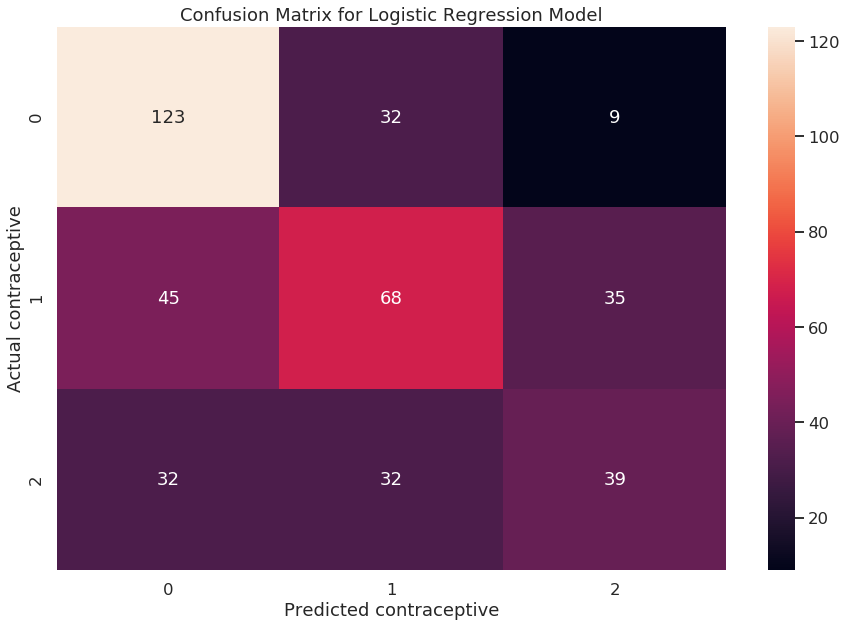

In [53]:
Y_pred = model.predict(processed_X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(15, 10))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
plt.title('Confusion Matrix for Logistic Regression Model', y=1.1)
plt.ylabel('Actual contraceptive')
plt.xlabel('Predicted contraceptive')

In [54]:
Y_train_hat = model.predict(processed_X_train)

summed_TPFP = np.sum(Y_train_hat)
TP = np.sum(np.logical_and(Y_train, Y_train_hat))
FP = summed_TPFP - TP
TN = np.sum(Y_train == 0) - FP
FN = np.sum(Y_train) - TP

logistic_predictor_precision = TP / (TP + FP)
logistic_predictor_recall = TP / (TP + FN)

print(logistic_predictor_precision, logistic_predictor_recall)

0.5681470137825421 0.48370273794002605


After computing the training and test error with a logistic regression model, we found that the training and test accuracy are very similar, but low.
At this point it did not seem likely that we had overfit the data, but we decided to consider fitting the features to different types of models to compare accuracies.

One Versus Rest Logistic Regression
=========

In [55]:
#creates a one versus rest logistic regression model
ovr_logistic_regression_model = LogisticRegression(multi_class = 'ovr', max_iter=1000)

In [56]:
#fits the model to 
ovr_logistic_regression_model.fit(processed_X_train, Y_train)
ovr_logistic_training_accuracy = ovr_logistic_regression_model.score(processed_X_train, Y_train)
print("Training Accuracy for One Versus Rest Logistic Regression: ", ovr_logistic_training_accuracy)

Training Accuracy for One Versus Rest Logistic Regression:  0.5507246376811594


In [57]:
ovr_logistic_regression_model.fit(processed_X_test, Y_test)
ovr_logistic_test_accuracy = ovr_logistic_regression_model.score(processed_X_test, Y_test)
print("Test Accuracy for One Versus Rest Logistic Regression: ", ovr_logistic_test_accuracy)

Test Accuracy for One Versus Rest Logistic Regression:  0.5542168674698795


Decision Trees
========

In [58]:
decision_tree_model = tree.DecisionTreeClassifier()

In [59]:
decision_tree_model.fit(processed_X_train, Y_train)
decision_training_accuracy = decision_tree_model.score(processed_X_train, Y_train)
print("Training Accuracy for Decision Tree Classifier: ", decision_training_accuracy)

Training Accuracy for Decision Tree Classifier:  0.9513457556935818


In [60]:
decision_test_accuracy = decision_tree_model.score(processed_X_test, Y_test)
print("Test Accuracy for Decision Tree Classifier: ", decision_test_accuracy)

Test Accuracy for Decision Tree Classifier:  0.4867469879518072


Random Forest Model
==============

In [61]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators = 50)
random_forest_model.fit(X_train[['num_child', 'wife_age']], Y_train)
forest_training_accuracy_two = random_forest_model.score(X_train[['num_child', 'wife_age']], Y_train)
print("Training Accuracy for Random Forest Classifier (Two Features): ", forest_training_accuracy_two)

Training Accuracy for Random Forest Classifier (Two Features):  0.6304347826086957


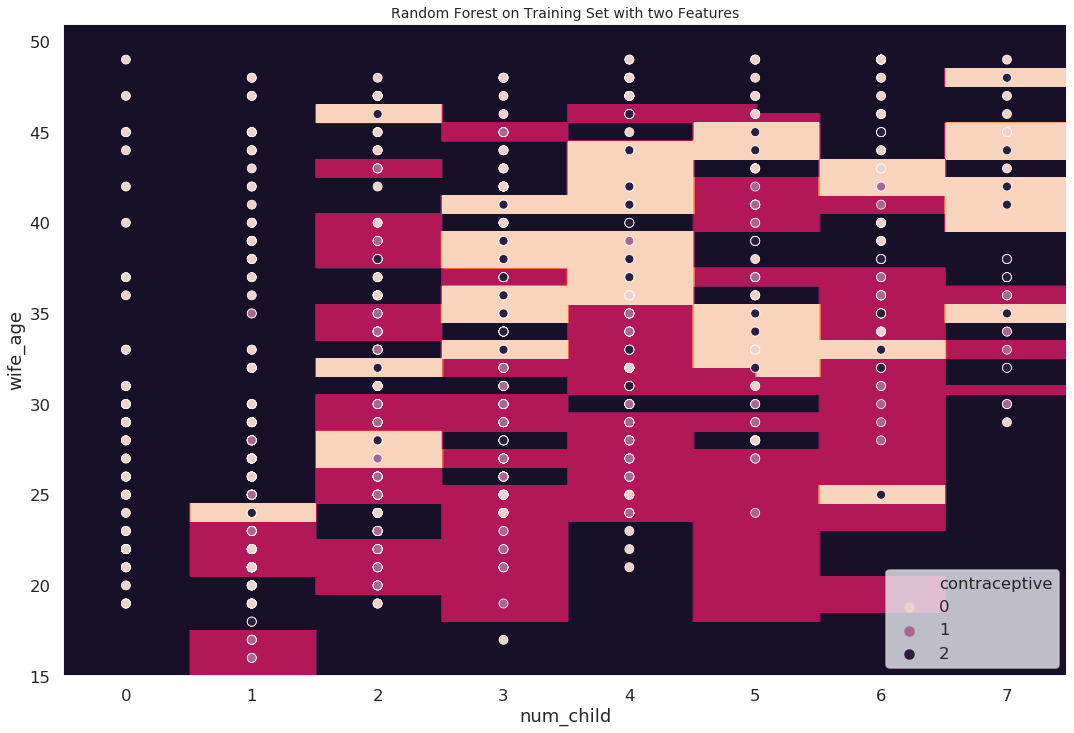

In [62]:
#sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(-0.5, 7.5, 0.02), np.arange(15, 51, 0.02))
Z_string = random_forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
tr_categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.figure(figsize=(18, 12))
plt.contourf(xx, yy, Z_int)
sns.scatterplot(data = training_set, x = 'num_child', y = 'wife_age', hue = 'contraceptive')
plt.title('Random Forest on Training Set with Two Features', fontsize = 14)

In [63]:
forest_test_accuracy_two = random_forest_model.score(X_test[['num_child', 'wife_age']], Y_test)
print("Test Accuracy for Random Forest Classifier (Two Features): ", forest_test_accuracy_two)

Test Accuracy for Random Forest Classifier (Two Features):  0.4939759036144578


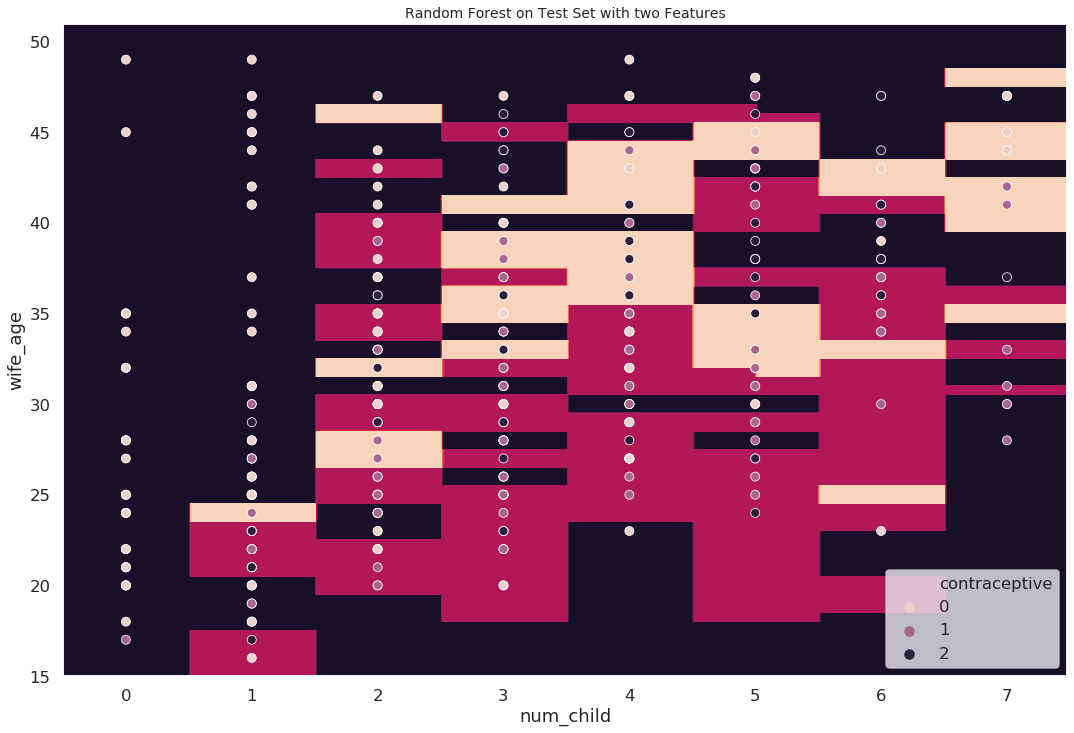

In [64]:
xx, yy = np.meshgrid(np.arange(-0.5, 7.5, 0.02), np.arange(15, 51, 0.02))
Z_string = random_forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
te_categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.figure(figsize=(18, 12))
plt.contourf(xx, yy, Z_int)
sns.scatterplot(data = test_set, x = 'num_child', y = 'wife_age', hue = 'contraceptive')
plt.title('Random Forest on Test Set with Two Features', fontsize = 14)

In [65]:
random_forest_model.fit(processed_X_train, Y_train)
forest_training_accuracy = random_forest_model.score(processed_X_train, Y_train)
print("Training Accuracy for Random Forest Classifier: ", forest_training_accuracy)

Training Accuracy for Random Forest Classifier:  0.9513457556935818


In [66]:
forest_test_accuracy = random_forest_model.score(processed_X_test, Y_test)
print("Test Accuracy for Random Forest Classifier", forest_test_accuracy)

Test Accuracy for Random Forest Classifier 0.5469879518072289


It appears that with a Random Forest model, on wife_age and num_child, which are the most variable features in our dataset, produced a similarly high training and test error.

In [ ]:
def find_precision_recall(model, processed_X_train):
    Y_train_hat = model.predict(processed_X_train)

    summed_TPFP = np.sum(Y_train_hat)
    TP = np.sum(np.logical_and(Y_train, Y_train_hat))
    FP = summed_TPFP - TP
    TN = np.sum(Y_train == 0) - FP
    FN = np.sum(Y_train) - TP

    logistic_predictor_precision = TP / (TP + FP)
    logistic_predictor_recall = TP / (TP + FN)

    print("Precision: ", logistic_predictor_precision)
    print("Recall: ", logistic_predictor_recall)

find_precision_recall()
find_precision_recall()
find_precision_recall()
find_precision_recall()